In [1]:
%matplotlib inline

import os 
import pandas as pd
import numpy as np
import seaborn as sns
from nltools.datasets import fetch_pain
from nltools.data import Brain_Data, Groupby, Adjacency
from nltools.mask import create_sphere
import matplotlib.pyplot as plt

In [2]:
data = fetch_pain()

In [3]:
print(len(data))

84


In [4]:
print(data.shape())

(84, 238955)


In [5]:
print(data[[1,6,2]])

nltools.data.brain_data.Brain_Data(data=(3, 238955), Y=0, X=(3, 40), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])


In [6]:
data.mean()

nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

In [7]:
data.std()

nltools.data.brain_data.Brain_Data(data=(238955,), Y=0, X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz, output_file=[])

In [8]:
print(data.mean().shape())

(238955,)


/Users/daisyburr/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.3011579126405195e-08
  ' condition number: {}'.format(rcond), RuntimeWarning)


overall Root Mean Squared Error: 1.15
overall Correlation: 1.00
overall CV Root Mean Squared Error: 1.89
overall CV Correlation: 0.39


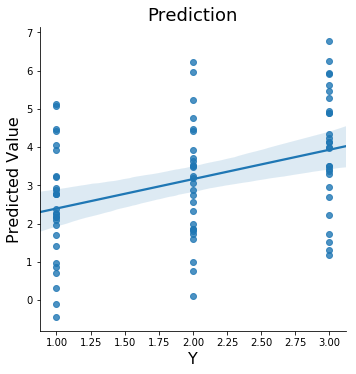

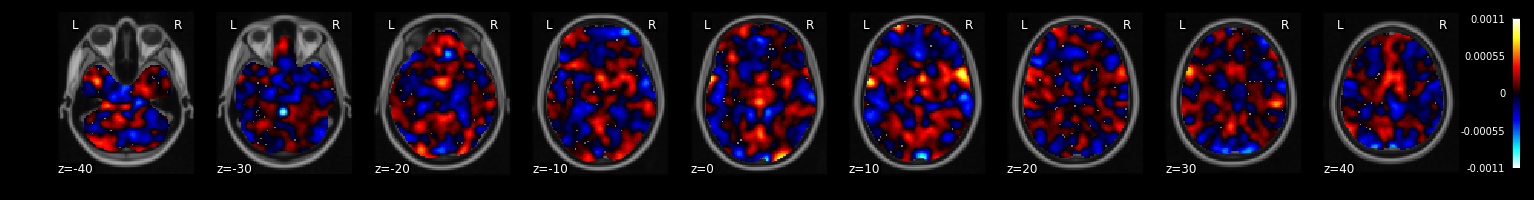

In [11]:
data.Y = data.X['PainLevel']
stats = data.predict(algorithm='ridge', cv_dict={'type': 'kfolds','n_folds':5,'subject_id':data.X['SubjectID']})

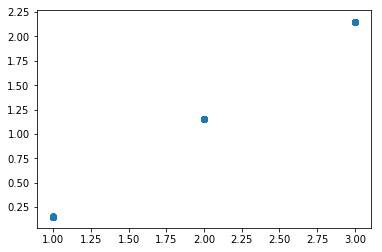

In [13]:
r = data.similarity(stats['weight_map'], method='dot_product') + stats['intercept']
plt.scatter(data.X['PainLevel'],r)

overall accuracy: 1.00
overall CV accuracy: 0.80


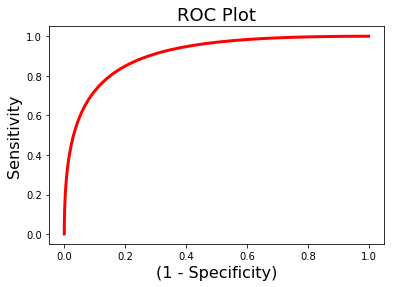

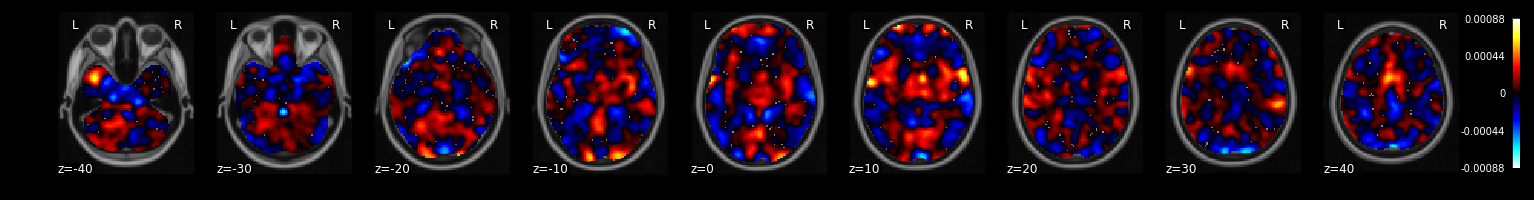

In [12]:
hvl = data[data.X['PainLevel']==3].append(data[data.X['PainLevel']==1])
hvl.X.reset_index(inplace=True,drop=True)
hvl.Y = hvl.X['PainLevel']==3
hvl.Y
subject_id = hvl.X['SubjectID']
# stats = hvl.predict(algorithm='svm', cv_dict={'type': 'kfolds','n_folds': 5}, **{'kernel':'linear'})
stats = hvl.predict(algorithm='svm', cv_dict={'type': 'loso','subject_id':subject_id}, **{'kernel':'linear'})

overall accuracy: 1.00
overall CV accuracy: 0.80


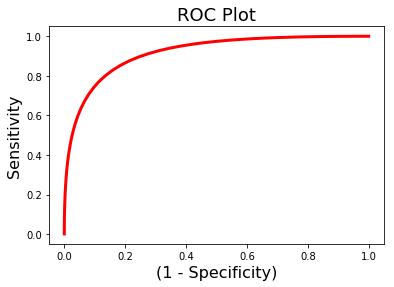

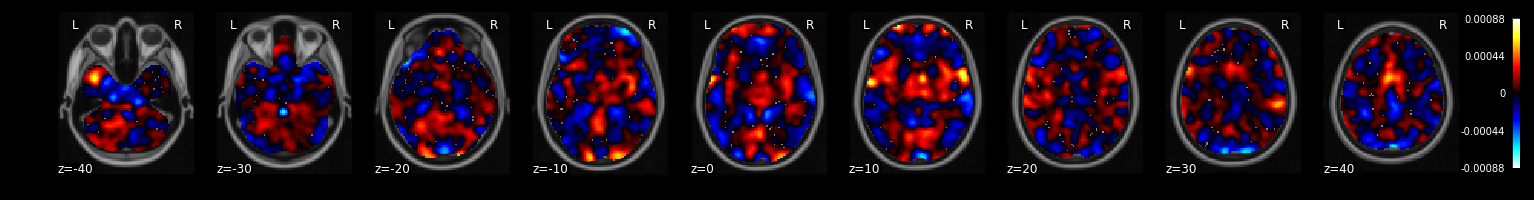

In [6]:
stats = hvl.predict(algorithm='svm', cv_dict={'type': 'kfolds','n_folds': 5,'subject_id':subject_id}, **{'kernel':'linear'})

/Users/daisyburr/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/daisyburr/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/daisyburr/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/daisyburr/anaconda3/lib/python3.6/site-packages/nltools/stats.py:91: RuntimeWarning: invalid value encountered in less_equal
  below = np.where(s <= null)[0]
/Users/daisyburr/anaconda3/lib/python3.6/site-packages/nltools/stats.py:143: RuntimeWarning: invalid value encountered in less
  mask.data = (mask.data < thr).astype(int)


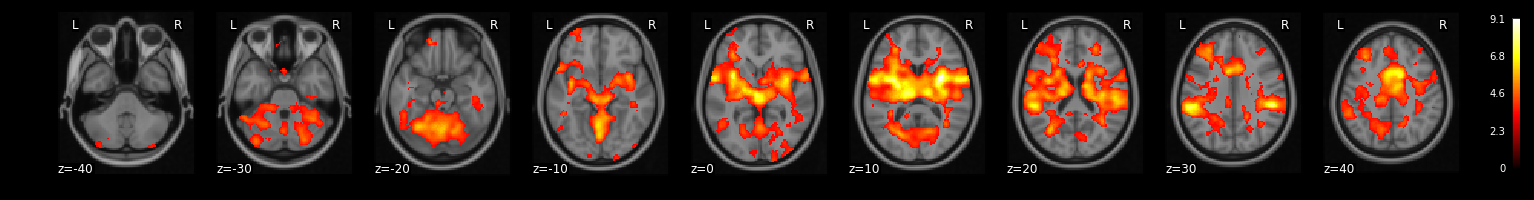

In [24]:
hvl = data[data.X['PainLevel']==2]-data[data.X['PainLevel']==1]
t = hvl.ttest(threshold_dict={'fdr':.01})
t['thr_t'].plot()

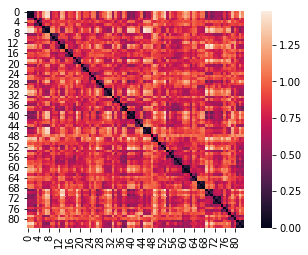

In [16]:
dist = data.distance(method='correlation')
dist.plot()

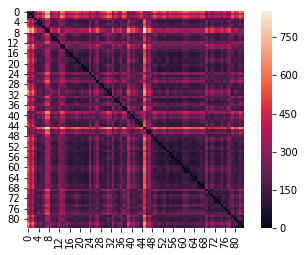

In [17]:
dist = data.distance(method='euclidean')
dist.plot()

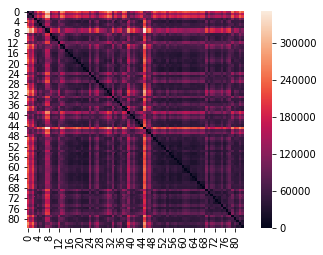

In [18]:
dist = data.distance(method='cityblock')
dist.plot()

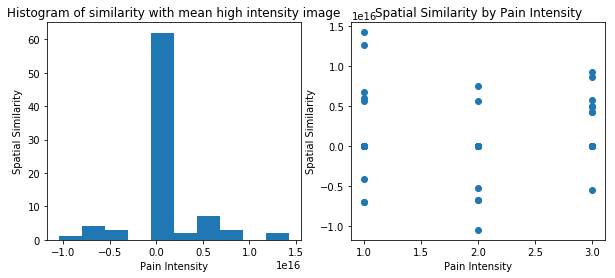

In [27]:
high = data[np.where(data.X['PainLevel']==2)[0]].mean()
r = high.similarity(data, method='correlation')

f,a = plt.subplots(ncols=2,figsize=(10,4))
a[0].hist(r)
a[0].set_ylabel('Spatial Similarity')
a[0].set_xlabel('Pain Intensity')
a[0].set_title('Histogram of similarity with mean high intensity image')
a[1].scatter(data.X['PainLevel'],r)
a[1].set_ylabel('Spatial Similarity')
a[1].set_xlabel('Pain Intensity')
a[1].set_title('Spatial Similarity by Pain Intensity')